In [1]:
import collections
import matplotlib.pyplot as plt

In [2]:
def get_data(file_name):
    a = open(file_name, 'r')
    train_loss = collections.defaultdict(float)
    train_acc = collections.defaultdict(float)
    val_loss = collections.defaultdict(float)
    val_acc = collections.defaultdict(float)
    test_loss = 0
    test_acc = 0
    count = 0
    for line in a:
        line = line.split()
        if line[1] == 'train':
            train_loss[int(line[0])] += float(line[2])
            train_acc[int(line[0])] += float(line[3])
        elif line[1] == 'val':
            val_loss[int(line[0])] += float(line[2])
            val_acc[int(line[0])] += float(line[3])
        elif line[1] == 'test':
            test_loss += float(line[2])
            test_acc += float(line[3])
            count += 1
        else:
            print("error")
    a.close()
    for key in train_loss.keys():
        train_loss[key] /= count
        train_acc[key] /= count
        val_loss[key] /= count
        val_acc[key]  /= count
    test_loss /= count
    test_acc /= count
    
    return train_loss, train_acc, val_loss, val_acc, test_loss, test_acc

In [3]:
def draw_IID_plot_0hop(device_num, epoch):
    plt.style.use('seaborn-whitegrid')
    
    for i in range(0, 11):
        IID = i/10
        file_name = "simulate__IID_"+str(IID)+"_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
        train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
        #plt.plot(train_acc.keys(), train_acc.values(), label = 'train_acc, device = '+str(device_num)+', epoch = '+str(epoch)+', IID = '+str(IID))
        plt.plot(val_acc.keys(), val_acc.values(), label = str(IID), markevery=10, markersize=8)
    plt.ylim(0, 1.0) 
    plt.xlim(0, 300) 
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # naming the x axis
    plt.xlabel('Iteration', fontsize=25)
    # naming the y axis
    plt.ylabel('Validation Accuracy', fontsize=25)

    plt.legend(fontsize=10, frameon=True)
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})

    #plt.title("Block Fed GCN, "+ 'val_acc, device = '+str(device_num)+', epoch = '+str(epoch))
    plt.savefig("0-hop_Val_acc_withdistribution.eps", format='eps')



In [4]:
def draw_IID_plot_1hop(device_num, epoch):
    plt.style.use('seaborn-whitegrid')
    
    for i in range(0, 11):
        IID = i/10
        file_name = "simulate__IID_"+str(IID)+"_1hop_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
        train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
        #plt.plot(train_acc.keys(), train_acc.values(), label = 'train_acc, device = '+str(device_num)+', epoch = '+str(epoch)+', IID = '+str(IID))
        plt.plot(val_acc.keys(), val_acc.values(), label = str(IID), markevery=10, markersize=8)
    plt.ylim(0, 1.0) 
    plt.xlim(0, 300) 
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # naming the x axis
    plt.xlabel('Iteration', fontsize=25)
    # naming the y axis
    plt.ylabel('Validation Accuracy', fontsize=25)

    plt.legend(fontsize=10, frameon=True)
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})

    #plt.title("Block Fed GCN, "+ 'val_acc, device = '+str(device_num)+', epoch = '+str(epoch))
    plt.savefig("1-hop_Val_acc_withdistribution.eps", format='eps')




In [5]:
def draw_IID_plot_2hop(device_num, epoch):
    plt.style.use('seaborn-whitegrid')
    
    for i in range(0, 11):
        IID = i/10
        file_name = "simulate__IID_"+str(IID)+"_2hop_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
        train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
        #plt.plot(train_acc.keys(), train_acc.values(), label = 'train_acc, device = '+str(device_num)+', epoch = '+str(epoch)+', IID = '+str(IID))
        plt.plot(val_acc.keys(), val_acc.values(), label = str(IID), markevery=10, markersize=8)
    plt.ylim(0, 1.0) 
    plt.xlim(0, 300) 
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # naming the x axis
    plt.xlabel('Iteration', fontsize=25)
    # naming the y axis
    plt.ylabel('Validation Accuracy', fontsize=25)

    plt.legend(fontsize=10, frameon=True)
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})

    #plt.title("Block Fed GCN, "+ 'val_acc, device = '+str(device_num)+', epoch = '+str(epoch))
    plt.savefig("2-hop_Val_acc_withdistribution.eps", format='eps')




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


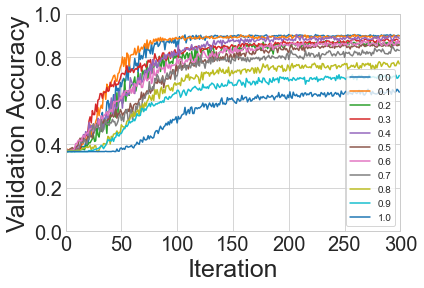

In [6]:
draw_IID_plot_0hop(3, 3)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


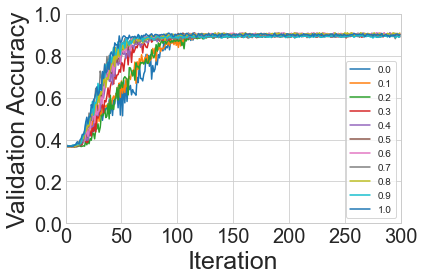

In [7]:
draw_IID_plot_1hop(3, 3)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


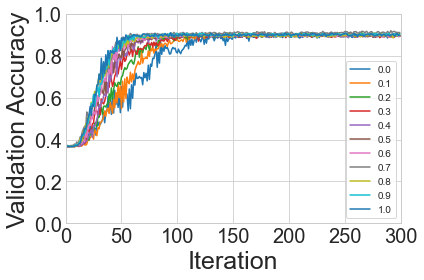

In [8]:
draw_IID_plot_2hop(3, 3)

In [9]:
def get_convergence_time(input_curve):
    converge_acc = list(input_curve.values())[-1]
    for acc_iter in input_curve:
         if acc_iter > 0:
            if abs(input_curve[acc_iter] - converge_acc) < 0.01:
                return acc_iter
    return len(input_curve)

def draw_IID_plot_with_convergence_time(device_num, epoch):
            plt.style.use('seaborn-whitegrid')
            X = []
            Y1 = []
            for i in range(0, 11):
                IID = i/10
                file_name = "simulate__IID_"+str(IID)+"_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
                train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
                X.append(IID)
                Y1.append(get_convergence_time(val_acc))


            plt.plot(X, Y1, 's-', label = 'FedGCN(0-hop)', markersize=8)#, label = 'converge_time, device = '+str(device_num)+', epoch = '+str(epoch))
            
            
            
            X = []
            Y1 = []
            for i in range(0, 11):
                IID = i/10
                file_name = "simulate__IID_"+str(IID)+"_1hop_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
                train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
                X.append(IID)
                Y1.append(get_convergence_time(val_acc))


            plt.plot(X, Y1, '+-', label = 'FedGCN(1-hop)', markersize=8)#, label = 'converge_time, device = '+str(device_num)+', epoch = '+str(epoch))


            
            X = []
            Y1 = []
            for i in range(0, 11):
                IID = i/10
                file_name = "simulate__IID_"+str(IID)+"_2hop_Block_federated_GCN_iter_300_epoch_"+str(epoch)+"_device_num_"+str(device_num)
                train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
                X.append(IID)
                Y1.append(get_convergence_time(val_acc))


            plt.plot(X, Y1, '*-', label = 'FedGCN(2-hop)', markersize=8)#, label = 'converge_time, device = '+str(device_num)+', epoch = '+str(epoch))

            plt.ylim(0, 300) 
            plt.xlim(-0.05, 1) 
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)

            # naming the x axis
            plt.xlabel('IID Degree', fontsize=25)
            # naming the y axis
            plt.ylabel('Convergence Time', fontsize=25)

            plt.legend(fontsize=20, frameon=True, loc = 'best')

            from matplotlib import rcParams
            rcParams.update({'figure.autolayout': True})
            plt.savefig("simulate_convergence_time_changeIID.png", format='png')


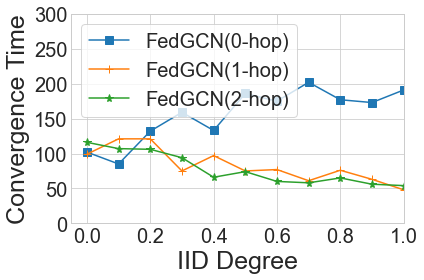

In [10]:
draw_IID_plot_with_convergence_time(3, 3)